<a href="https://colab.research.google.com/github/niwanulgiffar/Machine-Learning-Project/blob/main/Klasifikasi_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Screen name			: Screen name sama dengan username
- Foto profil			: Foto profil yang digunakan adalah foto diri sendiri atau bukan
- Following			: Jumlah following
- Following kurang dari 30 	: Apakah jumlah following kurang dari 30
- Followers			: Jumlah followers
- Followers lebih dari 1000 	: Apakah jumlah followers lebih dari 1000
- Tweet				: Jumlah tweet
- Tweet kurang dari 50		: Apakah jumlah tweet kurang dari 50
- Lokasi				: Mencantumkan lokasi apa tidak
- URL				: Mencantumkan link pada profil apa tidak
- Deskripsi			: Mengisi bio pada profil apa tidak
- Follower ratio 2:1		: Perbandingan jumlah following dan jumlah followers 2:1
- Follower ratio 50:1		: Perbandingan jumlah following dan jumlah followers 50:1
- Follower ratio 100:1		: Perbandingan jumlah following dan jumlah followers 100:1
- Pola aktivitas akun		: Akun memiliki pola tertentu dalam beraktivitas
- Usia akun			: Usia akun dalam bulan
- Usia akun kurang sama dengan 12	: Apakah usia akun kurang dari sama dengan 12 bulan apa tidak
- Rataan tweet perminggu	: Rata-rata tweets dalam satu minggu
- Retweet ratio 			: Rasio retweet terhadap jumlah tweet (dalam persen)
- Retweet ratio lebih dari sama dengan 60 : Apakah retweet ratio lebih dari 60% apa tidak
- Kategori			: Apakah akun ini termasuk bot apa tidak?





In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#collect data
from google. colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/KampusMerdeka

/content/drive/MyDrive/KampusMerdeka


In [ ]:
df = pd.read_csv(r'Bot Twitter.csv')
df.head(5)

,ID,Screen name,Foto Profil,Following,Following kurang 30,Followers,Followers lebih 1000,Tweet,Tweet kurang 50,Lokasi,...,Follower Ratio 2:1,Follower Ratio 50:1,Follower Ratio 100:1,Pola Aktivitas Akun,Usia Akun (bulan),Usia Akun kurang sama dengan 12,Rataan Tweet per Minggu,Retweet Ratio %,Retweet Ratio lebih sama dengan 60,Kategori
0,"1,32E+22",1,0,53,0,25,0,3,1,1,...,1,0,0,1,0,1,0.29,33,0,1
1,"1,32E+23",1,0,218,0,52,0,3,1,1,...,0,0,0,0,0,1,0.25,0,0,0
2,"1,33E+23",1,0,530,0,123,0,5,1,1,...,0,0,0,0,0,1,0.65,0,0,0
3,"1,33E+23",1,1,237,0,18,0,6,1,1,...,0,0,0,1,0,1,0.77,0,1,1
4,"1,35E+23",1,0,94,0,31,0,14,1,1,...,0,0,0,1,0,1,3700.00,86,1,1


In [ ]:
df.shape #melihat dimensi dari data (row, kolom)

(2000, 22)

In [ ]:
df.dtypes

ID                                     object
Screen name                             int64
Foto Profil                             int64
Following                               int64
Following kurang 30                     int64
Followers                               int64
Followers lebih 1000                    int64
Tweet                                   int64
Tweet kurang 50                         int64
Lokasi                                  int64
URL                                     int64
Deskripsi                               int64
Follower Ratio 2:1                      int64
Follower Ratio 50:1                     int64
Follower Ratio 100:1                    int64
Pola Aktivitas Akun                     int64
Usia Akun (bulan)                       int64
Usia Akun kurang sama dengan 12         int64
Rataan Tweet per Minggu               float64
Retweet Ratio %                         int64
Retweet Ratio lebih sama dengan 60      int64
Kategori                          

In [ ]:
col_names = ['ID', 'ScreenName', 'Foto', 'Following', 'FKurang30', 'Followers', 'Flebih1k', 'Tweet', 'TKurang50', 'Lokasi', 'URL', 'Deskripsi', 'FR21', 'FR501', 'FR1001', 'PAA', 'UABln', 'UAKurang1tahun', 'RTP', 'RRP', 'RRLebih60', 'Kategori']


df.columns = col_names

col_names

['ID',
 'ScreenName',
 'Foto',
 'Following',
 'FKurang30',
 'Followers',
 'Flebih1k',
 'Tweet',
 'TKurang50',
 'Lokasi',
 'URL',
 'Deskripsi',
 'FR21',
 'FR501',
 'FR1001',
 'PAA',
 'UABln',
 'UAKurang1tahun',
 'RTP',
 'RRP',
 'RRLebih60',
 'Kategori']

In [ ]:
# check missing values in variables

df.isnull().sum()

ID                0
ScreenName        0
Foto              0
Following         0
FKurang30         0
Followers         0
Flebih1k          0
Tweet             0
TKurang50         0
Lokasi            0
URL               0
Deskripsi         0
FR21              0
FR501             0
FR1001            0
PAA               0
UABln             0
UAKurang1tahun    0
RTP               0
RRP               0
RRLebih60         0
Kategori          0
dtype: int64

In [ ]:
# cek duplikat data
df.duplicated().sum()

0

In [ ]:
df.info() #memperlihatkan info umum dari dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2000 non-null   object 
 1   ScreenName      2000 non-null   int64  
 2   Foto            2000 non-null   int64  
 3   Following       2000 non-null   int64  
 4   FKurang30       2000 non-null   int64  
 5   Followers       2000 non-null   int64  
 6   Flebih1k        2000 non-null   int64  
 7   Tweet           2000 non-null   int64  
 8   TKurang50       2000 non-null   int64  
 9   Lokasi          2000 non-null   int64  
 10  URL             2000 non-null   int64  
 11  Deskripsi       2000 non-null   int64  
 12  FR21            2000 non-null   int64  
 13  FR501           2000 non-null   int64  
 14  FR1001          2000 non-null   int64  
 15  PAA             2000 non-null   int64  
 16  UABln           2000 non-null   int64  
 17  UAKurang1tahun  2000 non-null   i

In [ ]:
df.describe

<bound method NDFrame.describe of              ID  ScreenName  Foto  Following  FKurang30  Followers  Flebih1k  \
0      1,32E+22           1     0         53          0         25         0   
1      1,32E+23           1     0        218          0         52         0   
2      1,33E+23           1     0        530          0        123         0   
3      1,33E+23           1     1        237          0         18         0   
4      1,35E+23           1     0         94          0         31         0   
...         ...         ...   ...        ...        ...        ...       ...   
1995   15605485           1     1        973          0        710         0   
1996   14305560           0     1        326          0    1469005         1   
1997    7300962           1     1        513          0        115         1   
1998    5641772           1     0       4931          0      29043         1   
1999  492873531           1     1        546          0       1020         1   

     

In [ ]:
#menghitung jumlah row untuk setiap label

df.Kategori.value_counts()

1    1000
0    1000
Name: Kategori, dtype: int64

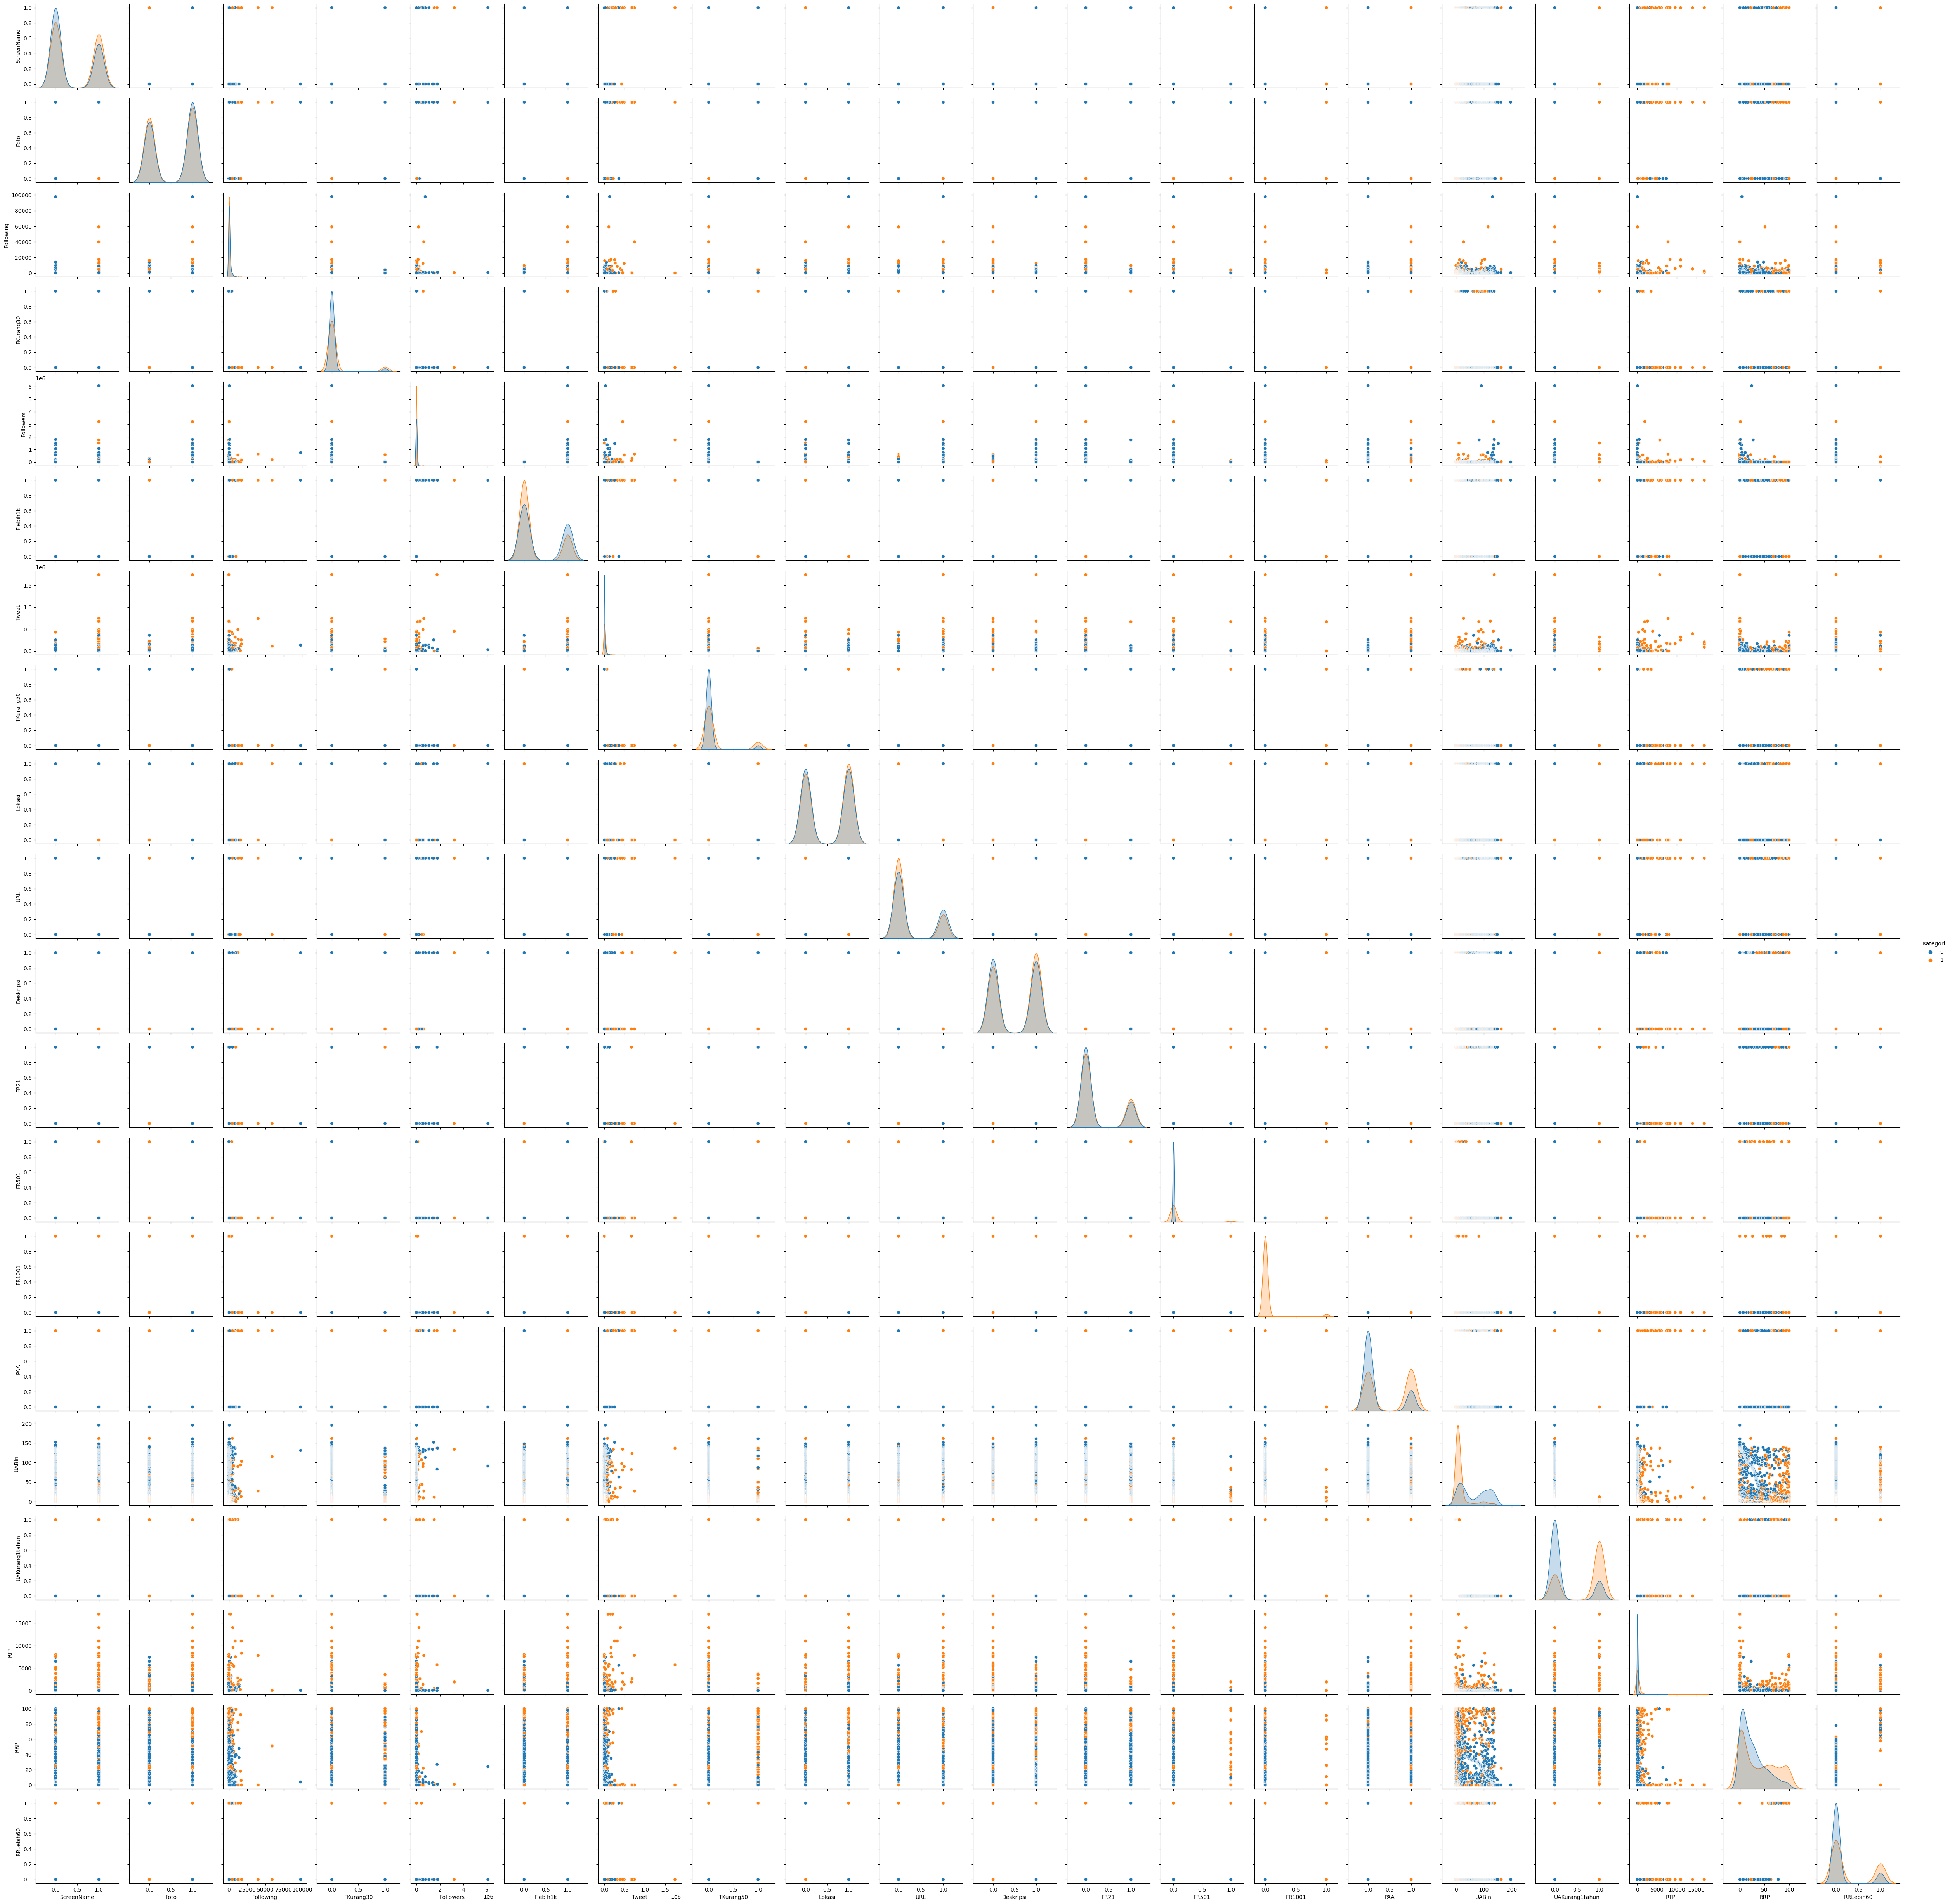

In [ ]:
sns.pairplot(df, hue='Kategori');

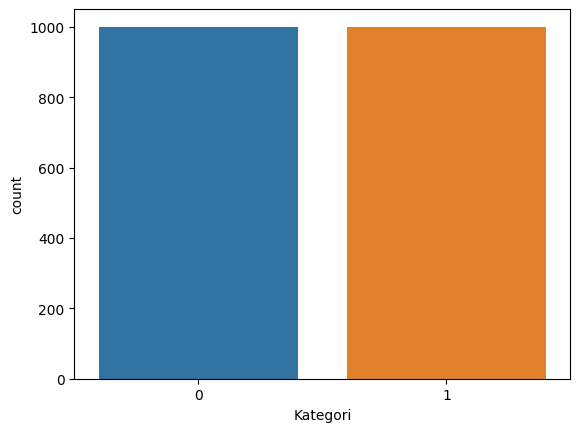

In [ ]:
s = sns.countplot(x = "Kategori", data = df)

In [ ]:
CS = pd.crosstab(index = df["Kategori"], columns = df["UABln"])
CS

UABln,0,1,2,3,4,5,6,7,8,9,...,141,142,143,145,147,148,152,161,162,196
Kategori,,,,,,,,,,,,,,,,,,,,,
0,25,32,20,8,11,16,5,11,10,29,...,1,4,3,1,1,1,1,1,0,1
1,97,53,51,52,50,44,47,56,51,46,...,0,0,0,1,0,0,0,0,1,0


<Axes: xlabel='UABln', ylabel='Count'>

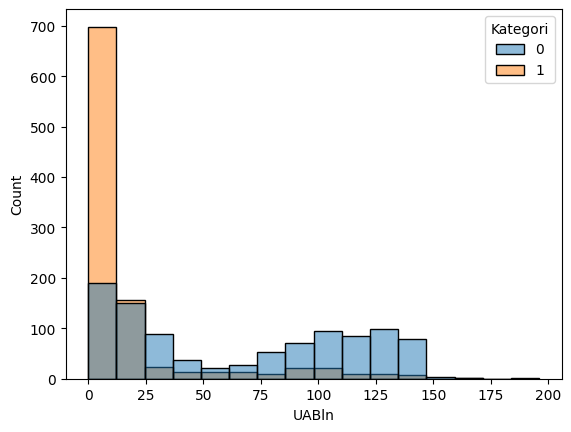

In [ ]:
sns.histplot(data=df,x='UABln',hue='Kategori')

<Axes: xlabel='Followers', ylabel='Following'>

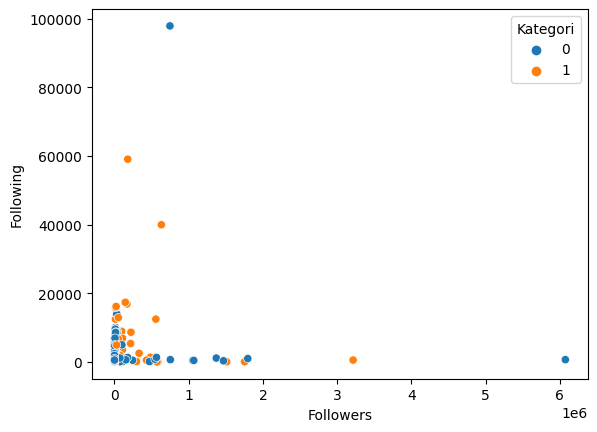

In [ ]:
sns.scatterplot(x=df.Followers,y=df.Following,hue=df.Kategori)

In [ ]:
df.corr()

,ScreenName,Foto,Following,FKurang30,Followers,Flebih1k,Tweet,TKurang50,Lokasi,URL,...,FR21,FR501,FR1001,PAA,UABln,UAKurang1tahun,RTP,RRP,RRLebih60,Kategori
ScreenName,1.000000,0.215362,0.040362,0.082606,0.052407,0.007710,0.073654,0.050847,0.146385,-0.036202,...,-0.092212,0.031343,0.017899,0.167809,-0.062544,0.041099,0.117392,0.020084,0.046881,0.095859
Foto,0.215362,1.000000,0.046860,-0.003684,0.071188,0.161556,0.071590,-0.106901,0.239977,0.192000,...,0.017744,-0.010304,0.001471,-0.067002,0.202994,-0.144753,0.063298,-0.037869,-0.011393,-0.033191
Following,0.040362,0.046860,1.000000,-0.076134,0.099041,0.273706,0.233340,-0.082639,0.014938,0.090045,...,-0.071958,-0.030401,-0.022930,0.076977,0.069780,-0.093501,0.168546,-0.016805,-0.017815,0.002681
FKurang30,0.082606,-0.003684,-0.076134,1.000000,-0.007169,-0.104125,-0.035152,0.271725,0.048795,-0.059784,...,-0.057284,-0.039442,-0.028299,0.018586,-0.096415,0.094287,-0.026507,-0.035603,-0.014182,0.103569
Followers,0.052407,0.071188,0.099041,-0.007169,1.000000,0.135337,0.311583,-0.030339,-0.001600,0.130932,...,-0.041090,-0.012754,-0.007802,0.019649,0.109675,-0.062576,0.082201,-0.060913,-0.044008,-0.016887
Flebih1k,0.007710,0.161556,0.273706,-0.104125,0.135337,1.000000,0.216428,-0.210772,0.046096,0.333815,...,-0.138416,-0.093307,-0.067348,0.030491,0.314551,-0.242406,0.141059,-0.147637,-0.114936,-0.163059
Tweet,0.073654,0.071590,0.233340,-0.035152,0.311583,0.216428,1.000000,-0.082058,-0.047008,0.169178,...,-0.045155,-0.001765,0.021892,0.157538,0.169569,-0.144778,0.405546,-0.030763,-0.004333,0.059650
TKurang50,0.050847,-0.106901,-0.082639,0.271725,-0.030339,-0.210772,-0.082058,1.000000,0.132620,-0.167231,...,-0.098437,0.350297,0.270514,-0.065050,-0.221029,0.256169,-0.042961,-0.082419,-0.029541,0.163702
Lokasi,0.146385,0.239977,0.014938,0.048795,-0.001600,0.046096,-0.047008,0.132620,1.000000,-0.007324,...,-0.022970,0.066734,0.063827,-0.021609,-0.025031,0.081251,0.035317,-0.030965,-0.001566,0.033018
URL,-0.036202,0.192000,0.090045,-0.059784,0.130932,0.333815,0.169178,-0.167231,-0.007324,1.000000,...,-0.000712,-0.071817,-0.057266,-0.045301,0.313376,-0.182244,0.132429,-0.163734,-0.122562,-0.080487


<Axes: >

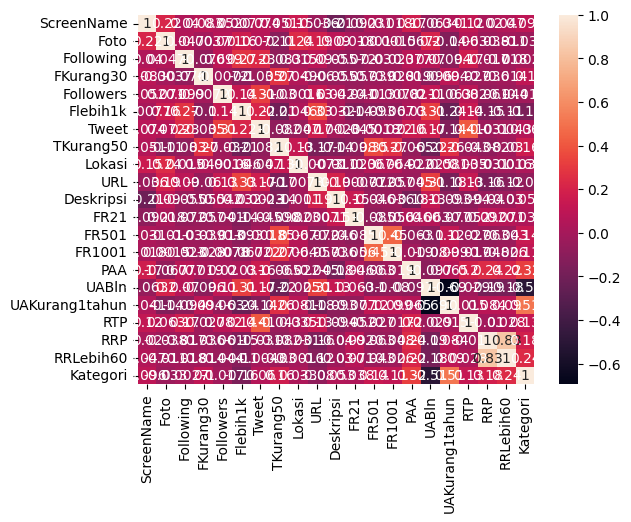

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#Ubah kategori menjadi bot atau bukan bot

df['Kategori'] = df['Kategori'].replace({0: 'Bukan Bot', 1: 'Bot'})

In [ ]:
# Menghapus kolom ID
df_new = df.drop(['ID'], axis=1)

In [ ]:
#import library untuk melakukan split data

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
#memisahkan paramatere dengan labelnya

x = df_new.drop('Kategori', axis=1)
y = df_new.Kategori
print(x.shape) #dimensi untuk parameter
print(y.shape) #dimensi untuk label

(2000, 20)
(2000,)


In [ ]:
#membagi data menjadi train dan tes

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 5)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1400, 20)
(1400,)
(600, 20)
(600,)


In [ ]:
# apply model decision tree

from sklearn import tree

model_dt = tree.DecisionTreeClassifier() #memanggil model decision tree pada library sklearn
model_dt = model_dt.fit(x_train, y_train) #fit model ke data train/data latih

In [ ]:
#Prediksi mode ke data tes
prediksi_dt = model_dt.predict(x_test)

print(prediksi_dt.shape) #dimensi untuk hasil prediksi label dari data tes
print(y_test.shape) #dimensi untuk label data tes sebenarnya

(600,)
(600,)


In [ ]:
#melihat confusion matrix berdasarkan hasil prediksi data tes dan label dari data tes yang sebenarnya
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediksi_dt, labels=model_dt.classes_)
print(cm)

[[260  44]
 [ 47 249]]


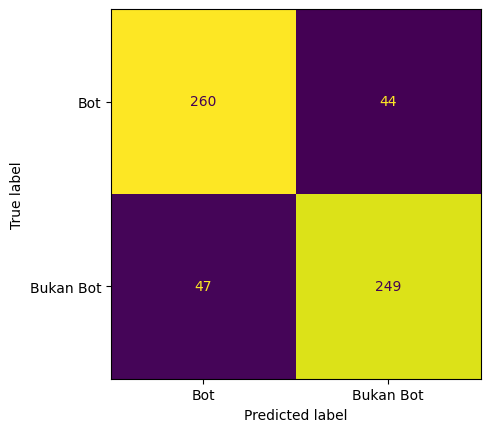

In [ ]:
#menampilkan confusion matrix menggunakan heat map
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels = model_dt.classes_)
disp.plot(colorbar=False)
plt.show()

In [ ]:
#menghitung akurasi model

from sklearn.metrics import accuracy_score, classification_report
print('The accuracy of the dt classifieracurracry_score', accuracy_score(y_test, prediksi_dt))

The accuracy of the dt classifieracurracry_score 0.8483333333333334


In [ ]:
#classification report

print(classification_report(y_test, prediksi_dt))

              precision    recall  f1-score   support

         Bot       0.85      0.86      0.85       304
   Bukan Bot       0.85      0.84      0.85       296

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



#Feature Importance

Feature: 0, Score:0.02396
Feature: 1, Score:0.01363
Feature: 2, Score:0.04262
Feature: 3, Score:0.00000
Feature: 4, Score:0.07830
Feature: 5, Score:0.00143
Feature: 6, Score:0.06884
Feature: 7, Score:0.00190
Feature: 8, Score:0.01331
Feature: 9, Score:0.00724
Feature: 10, Score:0.06859
Feature: 11, Score:0.00635
Feature: 12, Score:0.00766
Feature: 13, Score:0.00000
Feature: 14, Score:0.12741
Feature: 15, Score:0.39735
Feature: 16, Score:0.00000
Feature: 17, Score:0.07470
Feature: 18, Score:0.05614
Feature: 19, Score:0.01058


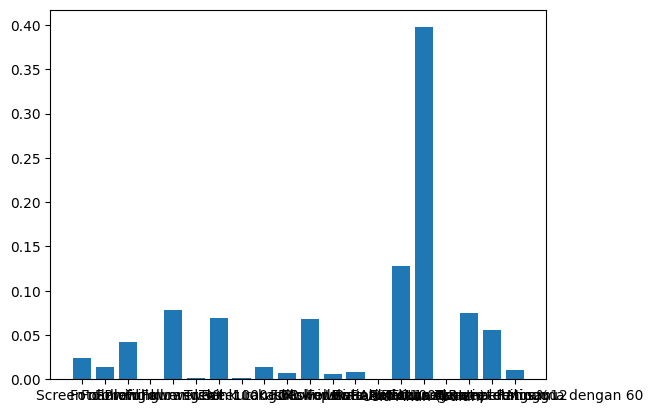

In [ ]:
#get importance
importance = model_dt.feature_importances_

# sumarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score:%.5f' % (i,v))

#plot for feature importance 
plt.bar(x.columns, importance)
plt.show()

#SVM

In [ ]:
#apply model SVM to Data

from sklearn.svm import SVC #Support Vector Machine

In [ ]:
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0, probability = True)
svm.fit(x_train, y_train)
predict_svm = svm.predict(x_test)

In [ ]:
#menghitung akurasi model SVM

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(accuracy_score(predict_svm,y_test)))

The accuracy of the svm classifier on test data is 0.50 out of 1


#Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
parameters = {'n_estimators': [int(x) for x in np.linspace(100, 1000, 10)]}
rf_classifier = GridSearchCV(rf, parameters, scoring='accuracy', cv=5)
rf_classifier.fit(x_train, y_train.ravel())

print(rf_classifier.best_params_)
print(rf_classifier.best_score_)

{'n_estimators': 800}
0.8964285714285714


In [ ]:
from sklearn.metrics import confusion_matrix

# Membuat prediksi menggunakan data uji
y_pred = rf_classifier.predict(x_test)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[281  23]
 [ 23 273]]


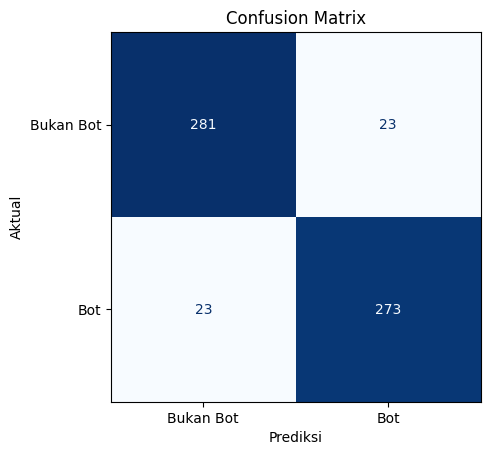

In [ ]:
# Menampilkan confusion matrix dengan heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bukan Bot', 'Bot'])
disp.plot(cmap='Blues', colorbar=False)

# Mengatur label sumbu x dan y
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

# Menampilkan plot
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#menghitung akurasi model

from sklearn.metrics import accuracy_score, classification_report
print('The accuracy of the RF classifieracurracry_score', accuracy_score(y_test, y_pred))

The accuracy of the RF classifieracurracry_score 0.9233333333333333
